
Symbolische Transformationsmatrix T_0_5:



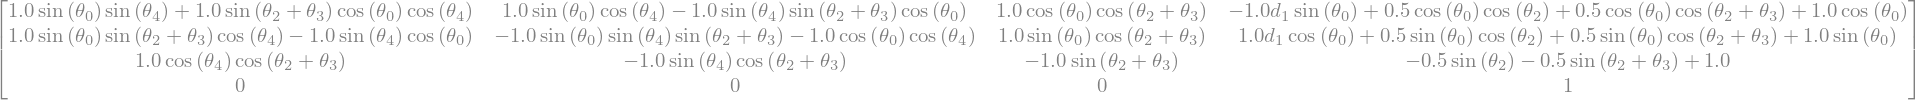

In [1]:
import sympy as sp
import roboticstoolbox as rtb
from spatialmath import SE3

# --- Symbole für Gelenkvariablen ---
theta0, d1, theta2, theta3, theta4 = sp.symbols('theta0 d1 theta2 theta3 theta4')

# --- Symbolisches DH-Modell ---
L0 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=1)                      # θ0 ist die Gelenkvariable
L1 = rtb.PrismaticDH(a=1, alpha=0, theta=0, qlim=[0, 1])              # d1 ist die Gelenkvariable
L2 = rtb.RevoluteDH(a=0.5, alpha=0, d=0)                              # θ2
L3 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=0, offset=-sp.rad(90))  # θ3
L4 = rtb.RevoluteDH(a=0, alpha=0, d=0.5)                              # θ4

robot = rtb.DHRobot([L0, L1, L2, L3, L4], name="DemoBot_Linear")

# --- Symbolische Vorwärtskinematik ---
T_symbolic = robot.fkine([theta0, d1, theta2, theta3, theta4])
T_simplified = sp.simplify(T_symbolic.A)

# --- Schöne Ausgabe ---
print("\n==============================")
print("Symbolische Transformationsmatrix T_0_5:")
print("==============================\n")
sp.init_printing(use_unicode=True)
display(T_simplified)


Symbolische Transformationsmatrix T_0_1:



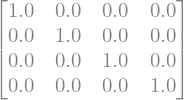


Symbolische Transformationsmatrix T_0_2:



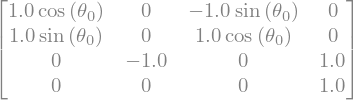


Symbolische Transformationsmatrix T_0_3:



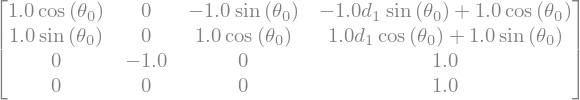


Symbolische Transformationsmatrix T_0_4:



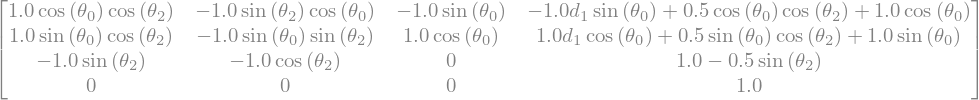


Symbolische Transformationsmatrix T_0_5:



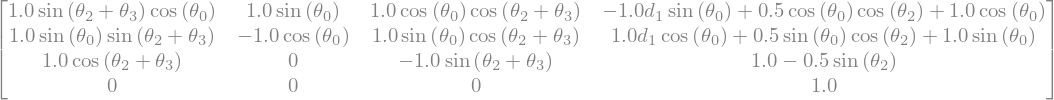


Symbolische Transformationsmatrix T_0_6:



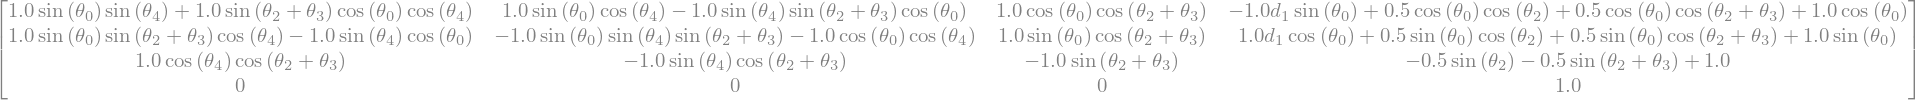

In [1]:
import sympy as sp
import roboticstoolbox as rtb
from spatialmath import SE3

# --- Symbole für Gelenkvariablen ---
theta0, d1, theta2, theta3, theta4 = sp.symbols('theta0 d1 theta2 theta3 theta4')

# --- Symbolisches DH-Modell ---
L0 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=1)
L1 = rtb.PrismaticDH(a=1, alpha=0, theta=0, qlim=[0, 1])
L2 = rtb.RevoluteDH(a=0.5, alpha=0, d=0)
L3 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=0, offset=-sp.rad(90))
L4 = rtb.RevoluteDH(a=0, alpha=0, d=0.5)

robot = rtb.DHRobot([L0, L1, L2, L3, L4], name="DemoBot_Linear")

# --- Symbolische Vorwärtskinematik für alle Gelenke ---
T_all = robot.fkine_all([theta0, d1, theta2, theta3, theta4])

# --- Ausgabe jeder Zwischentransformation ---
sp.init_printing(use_unicode=True)

for i, T in enumerate(T_all):
    T_simplified = sp.simplify(T.A)
    print("\n==============================")
    print(f"Symbolische Transformationsmatrix T_0_{i+1}:")
    print("==============================\n")
    # display() funktioniert nur in Jupyter/IPython
    try:
        from IPython.display import display
        display(T_simplified)
    except ImportError:
        # Fallback: Pretty-Print in Konsole
        print(sp.pretty(T_simplified, use_unicode=True))
